In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as p


In [166]:
df = pd.read_csv('anime.csv')

In [167]:
df.head()

,Rank,Title,Score
0,1,Fullmetal Alchemist: BrotherhoodTV (64 eps)Apr...,9.10
1,2,"Steins;GateTV (24 eps)Apr 2011 - Sep 20112,473...",9.07
2,3,Bleach: Sennen Kessen-henTV (13 eps)Oct 2022 -...,9.06
3,4,"Gintama°TV (51 eps)Apr 2015 - Mar 2016605,113 ...",9.06
4,5,Shingeki no Kyojin Season 3 Part 2TV (10 eps)A...,9.05


In [168]:
episode = []
for title in df['Title']:
    str = ''
    flag = 0

    for i in title:
        if(i=='('):
            flag=1
            continue
        if(i==')'):
            break
        if(flag==1):
            str+=i

    episode.append(str[:2])
df['Episode'] = episode

     

In [169]:
duration = []
for t in df['Title']:
    str = ''
    flag = 0
    for i in t:
        if(i ==')'):
            flag=1
            continue
        if(flag==1):
            str+=i
    duration.append(str[:19])
df['Duration'] = duration

In [170]:
df['Episode'] = df['Episode'].astype(int)

In [171]:
start = []
end = []
for t in df['Duration']:
    flag =0
    strs = t[:8]
    stre=t[11:]
    start.append(strs)
    end.append(stre)
df['Start']=start
df['End']=end
    

In [172]:
from datetime import datetime

In [173]:
Duration_Month = []
for i,j in zip(df['Start'],df['End']):
    start = datetime.strptime(i,"%b %Y")
    end = datetime.strptime(j,"%b %Y")
    diffm = (end.year - start.year) * 12 + (end.month - start.month)
    Duration_Month.append(diffm)
df['Duration_Months'] = Duration_Month
    


In [174]:
df = df.drop(df[df["Duration_Months"] == 0].index)



In [175]:
members = []
for e,t in zip(df['End'],df['Title']):
    idx = t.find(e)+8
    t = t[idx:]
    m = ''
    count = idx
    for i in t:
        if(i=='m'):
            break
        elif((i!=',')&(i!=' ')):
            m+=i
    m = int(m)
    members.append(m)
df['Members'] = members

        

In [176]:
df

,Rank,Title,Score,Episode,Duration,Start,End,Duration_Months,Members
0,1,Fullmetal Alchemist: BrotherhoodTV (64 eps)Apr...,9.10,64,Apr 2009 - Jul 2010,Apr 2009,Jul 2010,15,3218472
1,2,"Steins;GateTV (24 eps)Apr 2011 - Sep 20112,473...",9.07,24,Apr 2011 - Sep 2011,Apr 2011,Sep 2011,5,2473707
2,3,Bleach: Sennen Kessen-henTV (13 eps)Oct 2022 -...,9.06,13,Oct 2022 - Dec 2022,Oct 2022,Dec 2022,2,474138
3,4,"Gintama°TV (51 eps)Apr 2015 - Mar 2016605,113 ...",9.06,51,Apr 2015 - Mar 2016,Apr 2015,Mar 2016,11,605113
4,5,Shingeki no Kyojin Season 3 Part 2TV (10 eps)A...,9.05,10,Apr 2019 - Jul 2019,Apr 2019,Jul 2019,3,2146679
5,6,"Gintama'TV (51 eps)Apr 2011 - Mar 2012534,105 ...",9.04,51,Apr 2011 - Mar 2012,Apr 2011,Mar 2012,11,534105
7,8,Hunter x Hunter TV (148 eps)Oct 2011 - Sep 201...,9.04,14,Oct 2011 - Sep 2014,Oct 2011,Sep 2014,35,2701154
8,9,Kaguya-sama wa Kokurasetai: Ultra RomanticTV (...,9.04,13,Apr 2022 - Jun 2022,Apr 2022,Jun 2022,2,851445
9,10,Gintama': EnchousenTV (13 eps)Oct 2012 - Mar 2...,9.03,13,Oct 2012 - Mar 2013,Oct 2012,Mar 2013,5,313446
10,11,Shingeki no Kyojin: The Final Season - Kankets...,9.03,2,Mar 2023 - May 2023,Mar 2023,May 2023,2,472340


In [177]:
Title  = []
for t in df['Title']:
    name = ''
    idx = t.find('(') - 1
    name += t[:idx]
    Title.append(name)
df['Title'] = Title
    

In [178]:
df = df.drop(['Start','End'],axis = 1)


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             40 non-null     int64  
 1   Title            40 non-null     object 
 2   Score            40 non-null     float64
 3   Episode          40 non-null     int64  
 4   Duration         40 non-null     object 
 5   Duration_Months  40 non-null     int64  
 6   Members          40 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.5+ KB


In [180]:
df.to_csv('cleaned_anime.csv',index=False)

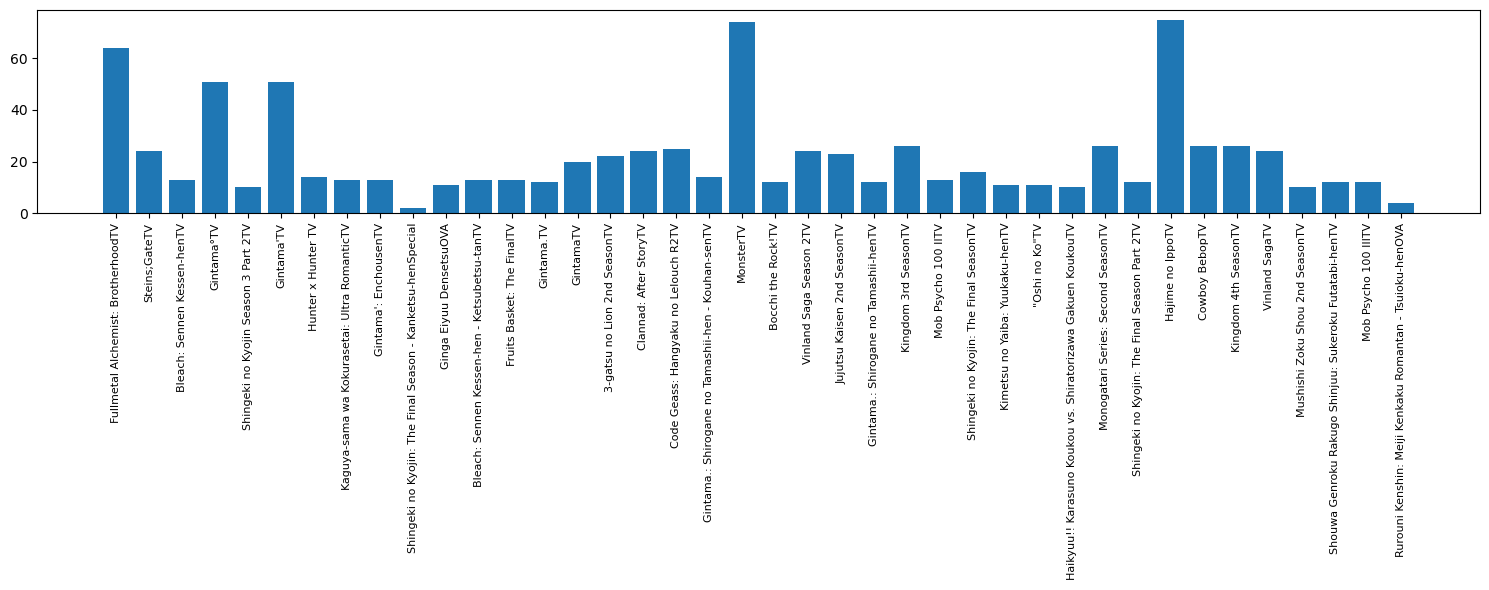

In [192]:
plt.figure(figsize=(15,6))  # wider canvas
plt.bar(df['Title'], df['Episode'])
plt.xticks(rotation=90, fontsize=8)  # rotate + shrink font
plt.tight_layout()
plt.savefig("my_graph1.png", dpi=300, bbox_inches="tight") 
plt.show()


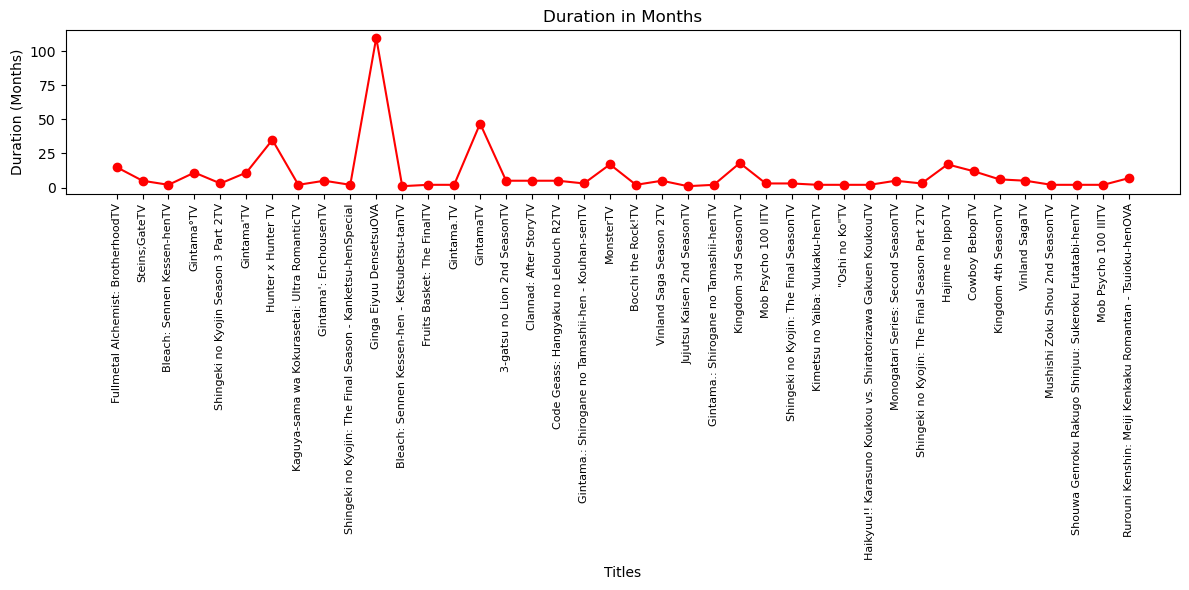

In [193]:
X = df['Title']  
Y = df['Duration_Months']

plt.figure(figsize=(12,6))
plt.plot(X, Y, marker='o', linestyle='-', color='r')
plt.xticks(rotation=90, fontsize=8)

plt.title("Duration in Months")
plt.xlabel("Titles")
plt.ylabel("Duration (Months)")
plt.tight_layout()
plt.savefig("my_graph2.png", dpi=300, bbox_inches="tight") 
plt.show()

In [183]:
top5_episodes = df.sort_values(by="Episode", ascending=False).head(5)
top5_duration = df.sort_values(by="Duration_Months", ascending=False).head(5)
top5_members  = df.sort_values(by="Members", ascending=False).head(5)

print("Top 5 by Episodes:\n", top5_episodes[['Title','Episode']])
print("\nTop 5 by Duration (Months):\n", top5_duration[['Title','Duration_Months']])
print("\nTop 5 by Members:\n", top5_members[['Title','Members']])


Top 5 by Episodes:
                                  Title  Episode
42                    Hajime no IppoTV       75
24                           MonsterTV       74
0   Fullmetal Alchemist: BrotherhoodTV       64
3                           Gintama°TV       51
5                           Gintama'TV       51

Top 5 by Duration (Months):
                       Title  Duration_Months
11  Ginga Eiyuu DensetsuOVA              110
15                GintamaTV               47
7        Hunter x Hunter TV               35
32     Kingdom 3rd SeasonTV               18
24                MonsterTV               17

Top 5 by Members:
                                      Title  Members
0       Fullmetal Alchemist: BrotherhoodTV  3218472
7                       Hunter x Hunter TV  2701154
1                            Steins;GateTV  2473707
4     Shingeki no Kyojin Season 3 Part 2TV  2146679
34  Shingeki no Kyojin: The Final SeasonTV  1882760


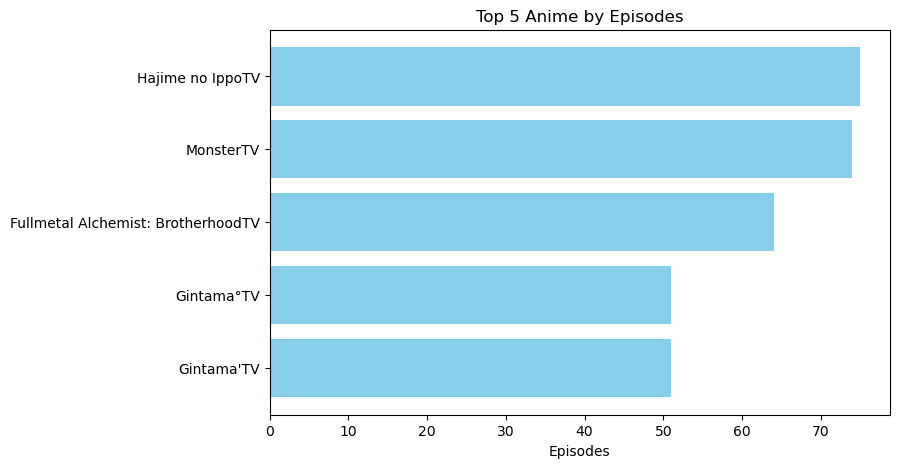

In [194]:
plt.figure(figsize=(8,5))
plt.barh(top5_episodes['Title'], top5_episodes['Episode'], color='skyblue')
plt.xlabel("Episodes")
plt.title("Top 5 Anime by Episodes")
plt.gca().invert_yaxis()
plt.savefig("my_graph3.png", dpi=300, bbox_inches="tight") 
plt.show()


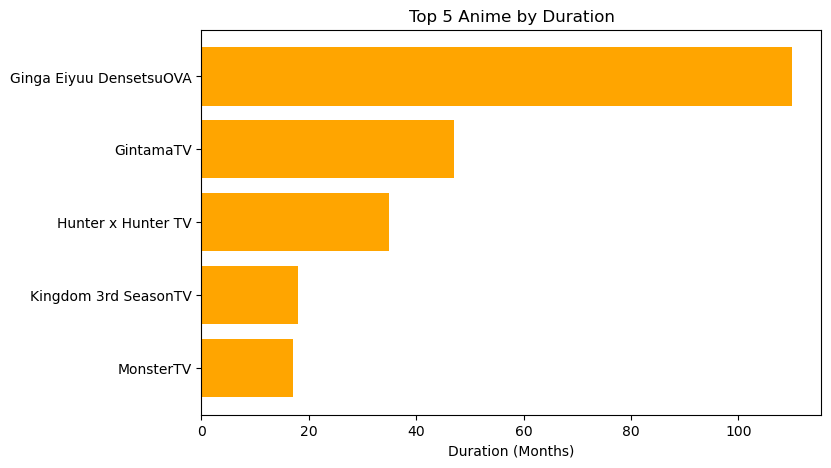

In [195]:
plt.figure(figsize=(8,5))
plt.barh(top5_duration['Title'], top5_duration['Duration_Months'], color='orange')
plt.xlabel("Duration (Months)")
plt.title("Top 5 Anime by Duration")
plt.gca().invert_yaxis()
plt.savefig("my_graph4.png", dpi=300, bbox_inches="tight") 
plt.show()


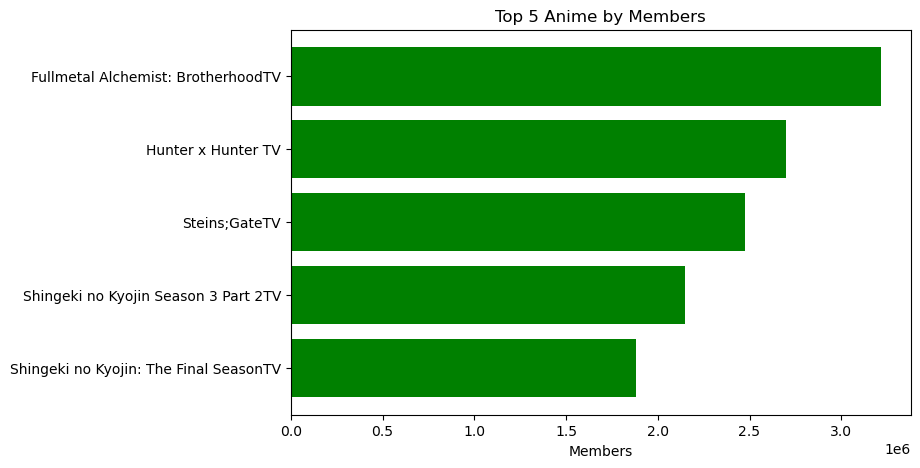

In [196]:
#top 5 anime by total members
plt.figure(figsize=(8,5))
plt.barh(top5_members['Title'], top5_members['Members'], color='green')
plt.xlabel("Members")
plt.title("Top 5 Anime by Members")
plt.gca().invert_yaxis()
plt.savefig("my_graph5.png", dpi=300, bbox_inches="tight") 
plt.show()
